In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import scipy as sc 
from pygenstability import run, plotting
from scipy.spatial import distance


from skimage import io
from skimage.color import rgb2lab, deltaE_cie76, rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

In [14]:
painting = io.imread('Teniers.png')
lab = rgb2gray(painting)

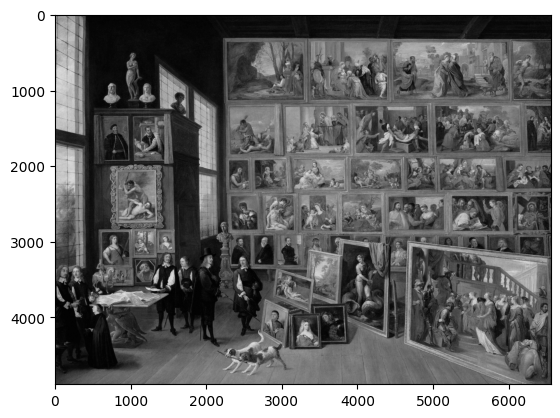

In [15]:
plt.imshow(lab, cmap='gray')

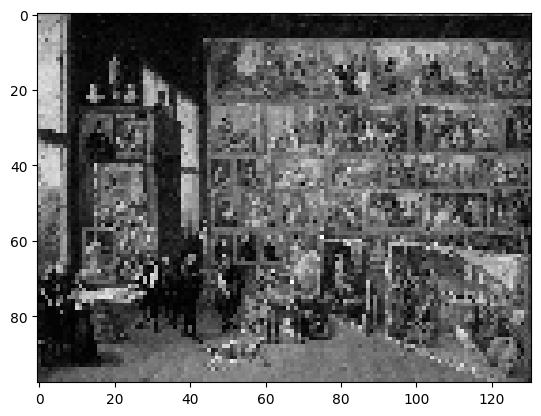

In [27]:
from scipy import ndimage
lab_red = ndimage.zoom(lab, .02)
plt.imshow(lab_red, cmap='gray')

In [28]:
# extract positions from a grid graph

G_ = nx.grid_graph([lab_red.shape[1], lab_red.shape[0]])
pos = {}
for i, node in enumerate(G_.nodes):
    pos[i] = (node[1], -node[0])

In [29]:
len(lab_red.flatten().reshape(-1, 1))

12838

In [30]:
# compute distance between grey scale pixel values
dist_pixel = sc.spatial.distance_matrix(lab_red.flatten().reshape(-1, 1), lab_red.flatten().reshape(-1, 1))


In [31]:
# compute distances between position coordinates of pixels

x = np.tile(np.arange(lab_red.shape[0]).reshape(-1,1), lab_red.shape[1])
y = np.tile(np.arange(lab_red.shape[1]).reshape(-1,1), lab_red.shape[0]).T

coords = np.dstack([x,y])
coords = coords.reshape(lab_red.shape[0] * lab_red.shape[1],2)

dist_image = sc.spatial.distance_matrix(coords, coords)
dist_image = dist_image + np.eye(dist_image.shape[0])

In [32]:
# convert pixel distance into similarity
sim_cutoff = 0.97
similarity = (1 - dist_pixel)

# set cut off on similarity to sparsify
similarity[similarity < sim_cutoff] = 0
np.fill_diagonal(similarity, 0)


In [33]:
# set distance cut off and sparsify by distance
dist_cutoff = 4
dist_image[dist_image > dist_cutoff] = 0
dist_image[dist_image > 0] = 1



In [ ]:
# compute minimuim spanning tree to ensure connected network
mst = nx.to_scipy_sparse_array(nx.minimum_spanning_tree(nx.Graph(dist_image)))

#  weight distance matrix by similarity, and ensure connected with spanning tree
adjacency = similarity * dist_image + mst

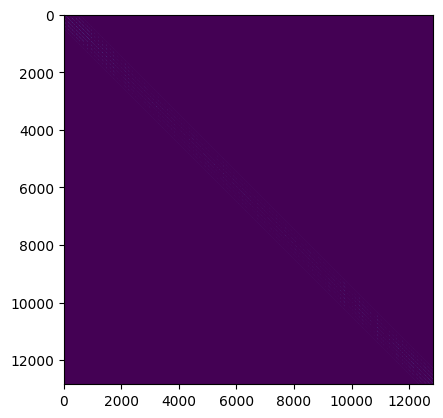

In [45]:
np.shape(adjacency)
plt.imshow(adjacency)

In [35]:
G = nx.Graph(adjacency)

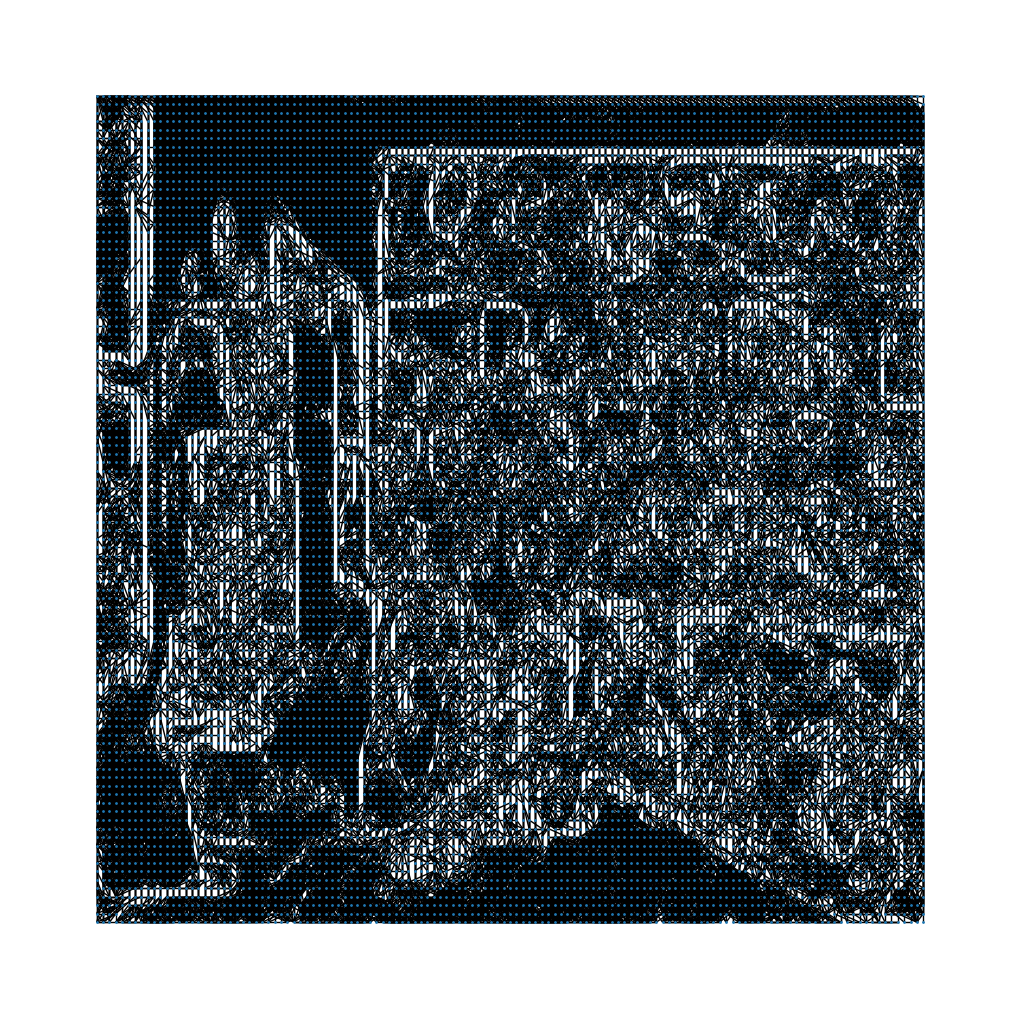

In [36]:
plt.figure(figsize=(10,10))
nx.draw(G, pos, node_size=1)

In [12]:
adjacency = nx.adjacency_matrix(G)

all_results = run(adjacency, min_scale=-1.5, max_scale = 2, 
                  n_scale = 20, constructor='linearized')

/tmp/ipykernel_28807/734893359.py:1: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 25.55it/s]
/home/robert/Documents/PythonCode/PyGenStability/src/pygenstability/optimal_scales.py:45: RuntimeWarning:

invalid value encountered in true_divide



In [15]:
# plot the results using plotly
_ = plotting.plot_scan(all_results, use_plotly=True)

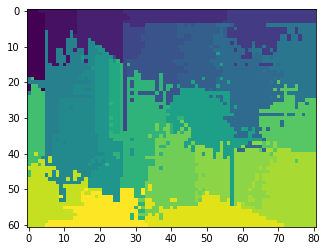

In [18]:
partition = all_results['community_id'][8].reshape(lab.shape)
plt.imshow(partition)

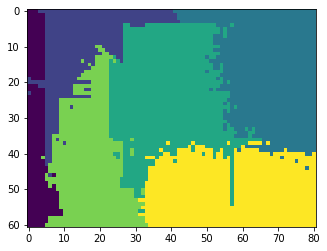

In [16]:
partition = all_results['community_id'][12].reshape(lab.shape)
plt.imshow(partition)